# Titanic Dataset: Data Cleaning and Exploratory Data Analysis (EDA)

## Aim:
The aim of this project is to perform data cleaning and exploratory data analysis
on the Titanic dataset to understand patterns, trends, and relationships between
different variables affecting passenger survival.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
data = pd.read_csv("titanic.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape


(891, 12)

In [4]:
data.info()


<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [8]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data['Age']= data['Age'].fillna(data['Age'].mean())

In [25]:
data['Embarked']= data['Embarked'].fillna(data['Embarked'].mode())


In [27]:
data.drop('Cabin', axis=1, inplace=True, errors='ignore')


In [28]:
data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [29]:
data.duplicated().sum()


np.int64(0)

In [30]:
data.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name               str
Sex                str
Age            float64
SibSp            int64
Parch            int64
Ticket             str
Fare           float64
Embarked           str
dtype: object

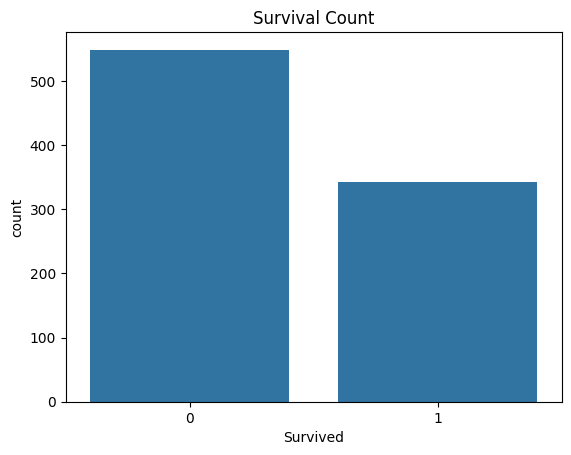

In [31]:
sns.countplot(x='Survived', data=data)
plt.title("Survival Count")
plt.show()


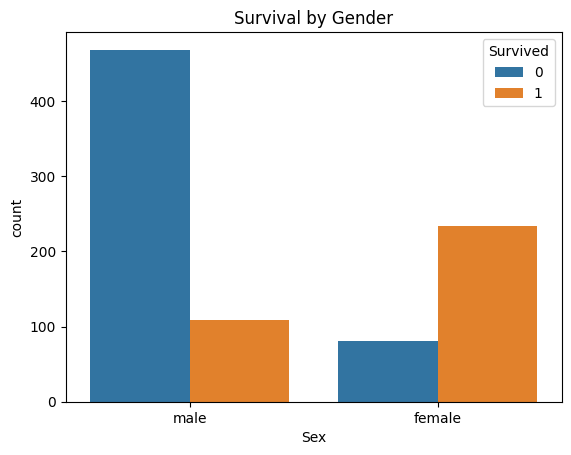

In [32]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title("Survival by Gender")
plt.show()


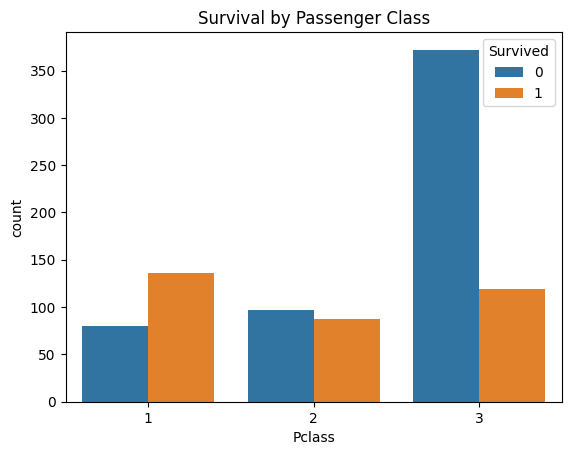

In [33]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title("Survival by Passenger Class")
plt.show()


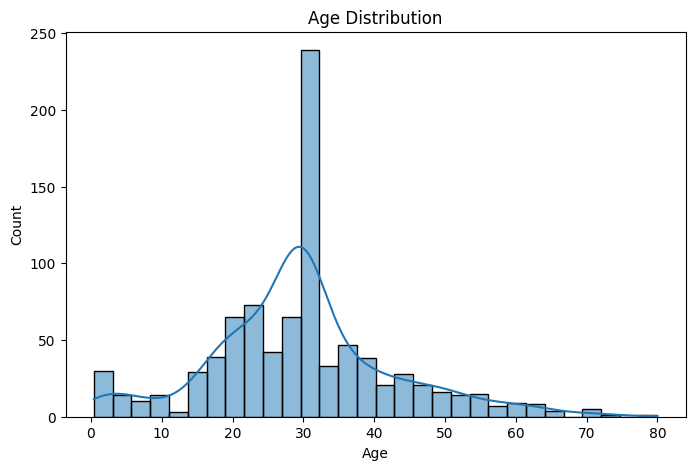

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


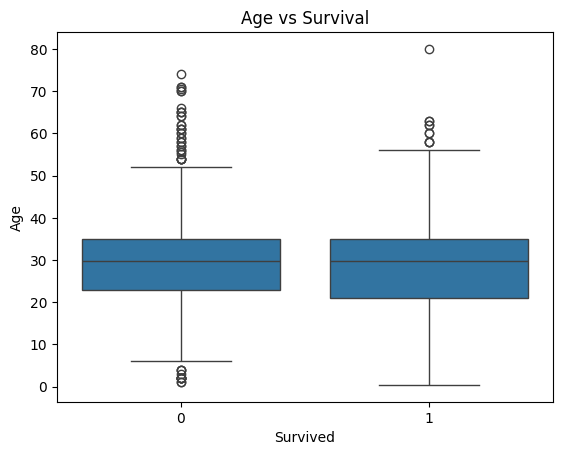

In [35]:
sns.boxplot(x='Survived', y='Age', data=data)
plt.title("Age vs Survival")
plt.show()


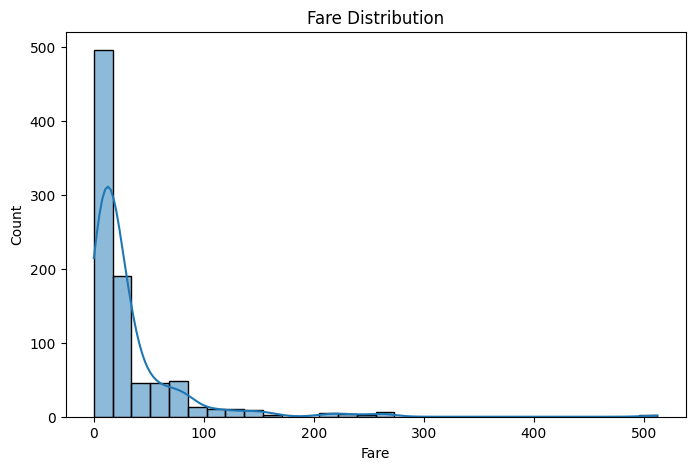

In [38]:
plt.figure(figsize=(8,5))
sns.histplot(data['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()


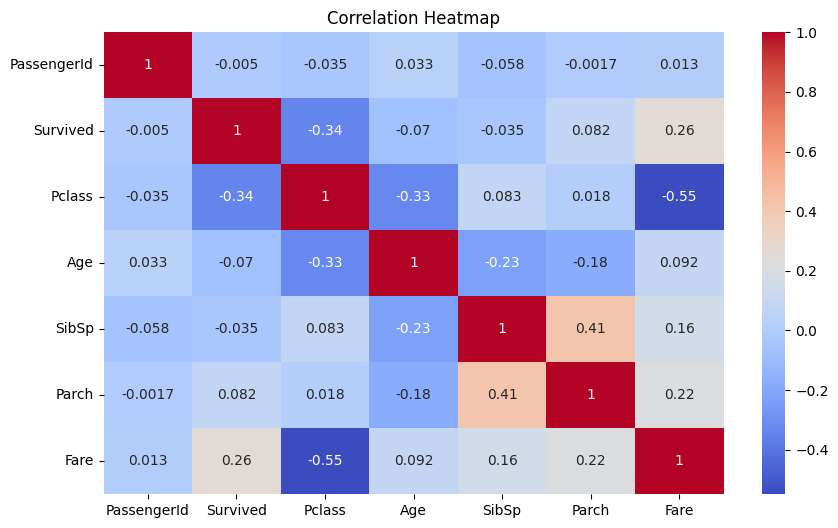

In [41]:
plt.figure(figsize=(10,6))
numeric_data = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Key Insights:

1. Female passengers had a significantly higher survival rate.
2. Passengers traveling in 1st class survived more than those in 3rd class.
3. Younger passengers had better chances of survival.
4. Higher fare indicates better survival probability.
5. Passenger class and gender were major factors affecting survival.


## Conclusion:

Through data cleaning and exploratory data analysis, we identified key patterns
and trends in the Titanic dataset. Survival was strongly influenced by gender,
passenger class, age, and fare. This analysis helps in understanding how different
factors affected survival during the Titanic disaster.
